# Recommendations Based Off Country Most Read In

In [2]:
import pandas as pd

In [3]:
books = pd.read_csv('Books Data with Category Language and Summary/Preprocessed_data.csv')
books.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada


In [79]:
books = books[books['rating'] != 0]

In [80]:
books.shape

(383852, 19)

In [81]:
#make a vocab of the countries
countries = books['country'].unique()
countries


array(['canada', nan, 'usa', 'malaysia', 'new zealand', 'brazil',
       'germany', 'italy', 'portugal', 'australia', 'costa rica',
       'netherlands', 'france', 'idaho, usa', 'united kingdom', 'aruba',
       'spain', 'singapore', 'india', 'romania', 'iran', 'austria',
       'belgium', 'philippines"', 'mexico', 'south africa', 'switzerland',
       'turkey', 'philippines', 'illinois, usa', 'china', 'kuwait',
       'indonesia', 'japan', 'nepal', 'peru', 'united states',
       'macedonia', 'kenya', 'mauritius', 'ireland', 'finland',
       'england, united kingdom', 'poland', 'n/a, nigeria', 'egypt',
       'yugoslavia', 'cambridgeshire, united kingdom', 'guatemala',
       'euskal herria', 'russia', 'palau', 'ca, usa', 'us', 'venezuela',
       'antarctica', 'denmark', 'bulgaria', 'okinawa, japan', 'dc, usa',
       'everywhere and anywhere', 'slovenia', 'chile', 'catalunya, spain',
       'washington, usa', 'k1c7b1', 'south korea', 'california, usa',
       'hong kong', 'luxembou

In [82]:
#remove books that have no country
books = books[books['country'].notna()]
#remove books if there arent 5 or more books from that country
books = books.groupby('country').filter(lambda x: len(x) >= 5)

In [83]:
books2 = books[books['country'].str.contains('usa|uk|germany')]
books2.shape

(274583, 19)

In [84]:
#reduce dataset to 10000
books = books.sample(n=10000, random_state=1)
books.shape

(10000, 19)

In [85]:
def most_common_country(book):
    book = books[books['book_title'] == book]
    book = book['country'].value_counts()
    book = book.index[0]
    return book


In [86]:
#use the function to find the most common country for each book
books['most_common_country'] = books['book_title'].apply(most_common_country)

In [87]:
books

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country,most_common_country
135925,135925,236757,"mars, pennsylvania, usa",34.7439,0553579754,3,Fear Nothing,DEAN KOONTZ,1998.0,Bantam,http://images.amazon.com/images/P/0553579754.0...,http://images.amazon.com/images/P/0553579754.0...,http://images.amazon.com/images/P/0553579754.0...,9,9,9,mars,pennsylvania,usa,usa
662672,662672,134434,"barcelona, barcelona, spain",25.0000,067974567X,7,The Boy Who Followed Ripley (Vintage Crime/Bla...,Patricia Highsmith,1993.0,Vintage Books USA,http://images.amazon.com/images/P/067974567X.0...,http://images.amazon.com/images/P/067974567X.0...,http://images.amazon.com/images/P/067974567X.0...,9,9,9,barcelona,barcelona,spain,spain
119984,119984,80810,"warrensburg, missouri, usa",33.0000,0553582143,9,Body of Lies,IRIS JOHANSEN,2003.0,Bantam,http://images.amazon.com/images/P/0553582143.0...,http://images.amazon.com/images/P/0553582143.0...,http://images.amazon.com/images/P/0553582143.0...,9,9,9,warrensburg,missouri,usa,usa
113628,113628,130224,"cornwall, new york, usa",27.0000,034540288X,5,The Lost World,Michael Crichton,1996.0,Ballantine Books,http://images.amazon.com/images/P/034540288X.0...,http://images.amazon.com/images/P/034540288X.0...,http://images.amazon.com/images/P/034540288X.0...,Six years after the secret disaster at Jurassi...,en,['Fiction'],cornwall,new york,usa,usa
813523,813523,78619,"melbourne, victoria, australia",37.0000,1872642225,9,Diving Deeper: More Erotic Lesbian Love Stories,Katherine V. Forrest,1994.0,Silver Moon Books,http://images.amazon.com/images/P/1872642225.0...,http://images.amazon.com/images/P/1872642225.0...,http://images.amazon.com/images/P/1872642225.0...,9,9,9,melbourne,victoria,australia,australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018858,1018858,254268,"arlington, texas, usa",48.0000,1928832954,7,A Biblical Defense of Catholicism,Dave Armstrong,2003.0,Sophia Institute Press,http://images.amazon.com/images/P/1928832954.0...,http://images.amazon.com/images/P/1928832954.0...,http://images.amazon.com/images/P/1928832954.0...,Here is a book that challenges Protestants to ...,en,['Religion'],arlington,texas,usa,usa
475030,475030,230427,"paderborn, nordrhein-westfalen, germany",28.0000,3596259924,10,Die Unertragliche Leichtigkeit des Seins...The...,Milan Kundera,1997.0,Distribooks Inc,http://images.amazon.com/images/P/3596259924.0...,http://images.amazon.com/images/P/3596259924.0...,http://images.amazon.com/images/P/3596259924.0...,9,9,9,paderborn,nordrhein-westfalen,germany,germany
843025,843025,93245,"enfield, new hampshire, usa",34.7439,052594690X,7,Himalayan Dhaba,Craig Joseph Danner,2002.0,Dutton Adult,http://images.amazon.com/images/P/052594690X.0...,http://images.amazon.com/images/P/052594690X.0...,http://images.amazon.com/images/P/052594690X.0...,"When Mary, a doctor still grieving over her hu...",en,['Fiction'],enfield,new hampshire,usa,usa
691180,691180,74836,"m, victoria, australia",24.0000,0091835216,7,Port Arthur: A Story of Strength and Courage,Margaret Scott,1997.0,Random House (Australia),http://images.amazon.com/images/P/0091835216.0...,http://images.amazon.com/images/P/0091835216.0...,http://images.amazon.com/images/P/0091835216.0...,9,9,9,m,victoria,australia,australia


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

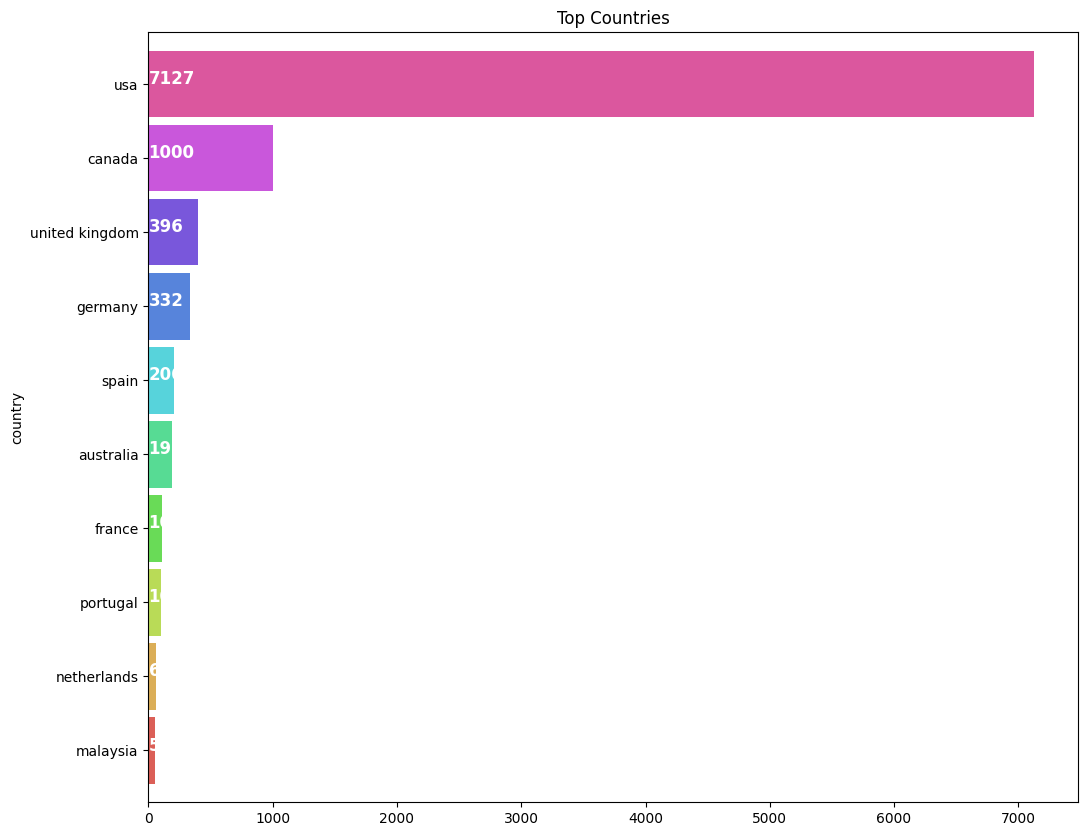

In [89]:
#show the distrubtion of users in each country for the top 10 countries
plt.subplots(figsize=(12,10))
list1 = []
for i in books['country']:
    list1.extend(i)
ax = pd.Series(books['country']).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(books['country']).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Countries')
plt.show()

In [90]:
books2 = books
books2.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country,most_common_country
135925,135925,236757,"mars, pennsylvania, usa",34.7439,0553579754,3,Fear Nothing,DEAN KOONTZ,1998.0,Bantam,http://images.amazon.com/images/P/0553579754.0...,http://images.amazon.com/images/P/0553579754.0...,http://images.amazon.com/images/P/0553579754.0...,9,9,9,mars,pennsylvania,usa,usa
662672,662672,134434,"barcelona, barcelona, spain",25.0000,067974567X,7,The Boy Who Followed Ripley (Vintage Crime/Bla...,Patricia Highsmith,1993.0,Vintage Books USA,http://images.amazon.com/images/P/067974567X.0...,http://images.amazon.com/images/P/067974567X.0...,http://images.amazon.com/images/P/067974567X.0...,9,9,9,barcelona,barcelona,spain,spain
119984,119984,80810,"warrensburg, missouri, usa",33.0000,0553582143,9,Body of Lies,IRIS JOHANSEN,2003.0,Bantam,http://images.amazon.com/images/P/0553582143.0...,http://images.amazon.com/images/P/0553582143.0...,http://images.amazon.com/images/P/0553582143.0...,9,9,9,warrensburg,missouri,usa,usa


In [91]:

#make a vocab of the categories
genreList = []
for index, row in books2.iterrows():
    genres = row["most_common_country"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)

def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

books2['country_bin'] = books2['most_common_country'].apply(lambda x: binary(x))
books2['country_bin'].head()

from scipy import spatial

def Similarity(book_Id1, book_Id2):
    a = books2.iloc[book_Id1]
    b = books2.iloc[book_Id2]
    
    categoryA = a['country_bin']
    categoryB = b['country_bin']
    
    categoriyDistance = spatial.distance.cosine(categoryA, categoryB)
    return categoriyDistance

new_id = list(range(0,books2.shape[0]))
books2['new_id']=new_id
books2=books2[['book_title','most_common_country','rating','country_bin','new_id']]
books2.head()

,book_title,most_common_country,rating,country_bin,new_id
135925,Fear Nothing,usa,3,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
662672,The Boy Who Followed Ripley (Vintage Crime/Bla...,spain,7,"[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
119984,Body of Lies,usa,9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
113628,The Lost World,usa,5,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
813523,Diving Deeper: More Erotic Lesbian Love Stories,australia,9,"[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",4


In [69]:
import operator

#make a prediction function that takes in a book title and returns the top 10 books that are more similar to it based on the country and the rating
def predict_score(name):
    #name = input('Enter a movie title: ')
    new_book = books2[books2['book_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Book: ',new_book.book_title.values[0])
    def getNeighbors(baseBook, K):
        distances = []
    
        for index, book in books2.iterrows():
            if book['new_id'] != baseBook['new_id'].values[0]:
                dist = Similarity(baseBook['new_id'].values[0], book['new_id'])
                distances.append((book['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_book, K)
    
    print('\nRecommended Books: \n')
    for neighbor in neighbors:
        avgRating = avgRating+books2.iloc[neighbor[0]][2]  
        print( books2.iloc[neighbor[0]][0]+" | Country: "+str(books2.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(books2.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K


In [92]:
predict_score('The Bourne Identity')

Selected Book:  The Bourne Identity

Recommended Books: 

Fear Nothing | Country: usa | Rating: 3
Body of Lies | Country: usa | Rating: 9
The Lost World | Country: usa | Rating: 5
Eats, Shoots & Leaves: The Zero Tolerance Approach to Punctuation | Country: usa | Rating: 10
Ed Emberley's Drawing Book of Faces | Country: usa | Rating: 9
The Great Gatsby | Country: usa | Rating: 2
How to Watch TV News | Country: usa | Rating: 7
The Coming Plague: Newly Emerging Diseases in a World Out of Balance | Country: usa | Rating: 8
Middlemarch | Country: usa | Rating: 9
Stories That Sneak Up on You: 30 Parables for Pastors, Teachers, and Youth Workers | Country: usa | Rating: 10




In [94]:
predict_score('When Lightning Strikes')

Selected Book:  When Lightning Strikes

Recommended Books: 

ErlkÃ¶nigs Tochter: Gedichte | Country: germany | Rating: 10
Riptide | Country: germany | Rating: 9
Rottmanns Bilder: Roman | Country: germany | Rating: 9
Dubliners a Portrait of the Artist As A | Country: germany | Rating: 8
The Door in the Lake | Country: germany | Rating: 7
Das Lacheln der Fortuna: Historischer Roman | Country: germany | Rating: 9
Le Zebre | Country: germany | Rating: 7
Die fÃ?Â¼nfte Frau. | Country: germany | Rating: 9
Cinderella | Country: germany | Rating: 5
Star Trek. Mission Farpoint / Die FriedenswÃ?Â¤chter / Die Kinder von Hamlin. | Country: germany | Rating: 5




# Recommendations based off country, rating and category

# Recommendations Based Off Country Most Popular In

In [132]:
#import the data
books = pd.read_csv('Books Data with Category Language and Summary/Preprocessed_data.csv')

In [133]:
books.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada


In [134]:
#reduce dataset to 10000
books = books.sample(n=10000, random_state=1)

In [135]:
#remove books that have no country
books = books[books['country'].notna()]
#remove books if there arent 5 or more books from that country
books = books.groupby('country').filter(lambda x: len(x) >= 5)

In [136]:
books.shape

(9569, 19)

In [137]:
#make afunction that finds the most common country for each book
def most_common_country(book):
    book = books[books['book_title'] == book]
    book = book['country'].value_counts()
    book = book.index[0]
    return book

In [138]:
#use the function to find the most common country for each book
books['most_common_country'] = books['book_title'].apply(most_common_country)

In [139]:
#make a function that finds that average rating for each book
def average_rating(book):
    book = books[books['book_title'] == book]
    book = book['rating'].mean()
    return book


In [140]:
#use function to find the average rating for each book
books['average_rating'] = books['book_title'].apply(average_rating)


In [141]:
books.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,...,img_m,img_l,Summary,Language,Category,city,state,country,most_common_country,average_rating
587421,587421,23902,"london, england, united kingdom",34.7439,0933328133,7,Platinum Logic,Tony Parsons,1982.0,Delilah Books,...,http://images.amazon.com/images/P/0933328133.0...,http://images.amazon.com/images/P/0933328133.0...,9,9,9,london,england,united kingdom,united kingdom,7.0
320829,320829,207499,"las cruces, new mexico, usa",34.7439,0553278002,0,The Icarus Agenda,Robert Ludlum,1989.0,Bantam Books,...,http://images.amazon.com/images/P/0553278002.0...,http://images.amazon.com/images/P/0553278002.0...,When his part in the settlement of a hostage c...,en,['Fiction'],las cruces,new mexico,usa,usa,0.0
659127,659127,33580,"rockwell, north carolina, usa",27.0000,0919345344,0,Aradia: Gospel of the Witches,Charles G. Leland,1999.0,Phoenix Publishing (WA),...,http://images.amazon.com/images/P/0919345344.0...,http://images.amazon.com/images/P/0919345344.0...,"Here, in the story of the goddess Aradia, who ...",en,"['Body, Mind & Spirit']",rockwell,north carolina,usa,usa,0.0


In [153]:
#make a column counting the number of times its been rated in the most common country
books['count'] = books.groupby('book_title')['most_common_country'].transform('count')
books


,book_title,most_common_country,average_rating,new_id,average_rating_and_country,count
587421,Platinum Logic,united kingdom,7.0,0,7.0united kingdom,1
320829,The Icarus Agenda,usa,0.0,1,0.0usa,2
659127,Aradia: Gospel of the Witches,usa,0.0,2,0.0usa,1
888113,Swamp Monsters (Easy to Read Level 3),usa,0.0,3,0.0usa,1
69970,The Funhouse,usa,0.0,4,0.0usa,3
...,...,...,...,...,...,...
353078,Blithe Images,canada,4.0,9564,4.0canada,2
191648,"Memnoch the Devil (Vampire Chronicles, No 5)",usa,0.0,9565,0.0usa,1
661619,So Mote It Be,usa,5.0,9566,5.0usa,1
393326,DELUSIONS OF GRANDMA : DELUSIONS OF GRANDMA,usa,0.0,9567,0.0usa,1


In [143]:
#make a genre vocab for the countries and the average rating
genreList = []
for index, row in books.iterrows():
    genres = row["most_common_country"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)

def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

books['country_bin'] = books['most_common_country'].apply(lambda x: binary(x))
books['country_bin'].head()

587421    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...
320829    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...
659127    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...
888113    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...
69970     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...
Name: country_bin, dtype: object